In [35]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
admission = pd.read_csv('/Users/CAICX10/desktop/Git_ds_project_repo/ds_abtest/datasets/admissions.csv')
checkout = pd.read_csv('/Users/CAICX10/desktop/Git_ds_project_repo/ds_abtest/datasets/checkout.csv')
AdSmart = pd.read_csv('/Users/CAICX10/desktop/Git_ds_project_repo/ds_abtest/datasets/AdSmartABdata.csv')

In [37]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1.0,F,chrome,66.168628
1,1,876599,A,NaN,0.0,M,firefox,49.801887
2,2,905407,A,27.446845,1.0,M,chrome,56.744856
3,3,883562,A,30.602233,1.0,M,safari,71.890718
4,4,840542,A,29.668895,1.0,F,safari,67.410696


In [39]:
AdSmart.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


Some EDA and visualization

In [40]:
# Check the distribution of the browsers

# Determine the normalized distribution of browser counts
checkout['browser'].value_counts(normalize = True)

# Draw a random sample of rows
sample_df = checkout.sample(n = 2000)

# Check the counts distribution of sampled users' browsers
sample_df['browser'].value_counts(normalize = True)

# Check the counts distribution of browsers across checkout pages
checkout.groupby('checkout_page')['browser'].value_counts(normalize = True)

checkout_page  browser
A              chrome     0.341333
               safari     0.332000
               firefox    0.326667
B              safari     0.352000
               firefox    0.325000
               chrome     0.323000
C              safari     0.346000
               chrome     0.330000
               firefox    0.324000
Name: proportion, dtype: float64

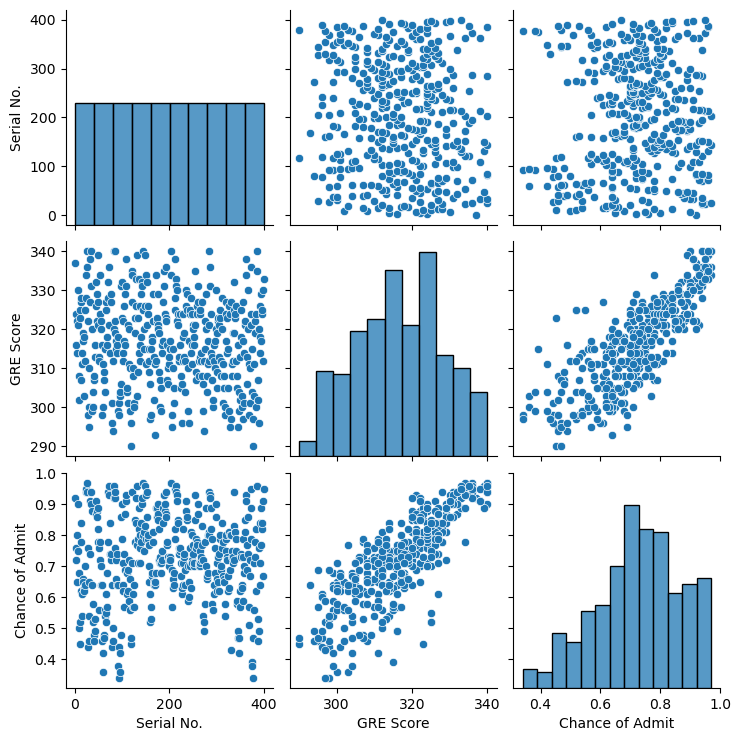

In [41]:
# Correlation Visual Inspection

sns.pairplot(admission[['Serial No.','GRE Score', 'Chance of Admit']])


In [42]:
# Print Pearson Correlation Coefficient

admission['GRE Score'].corr(admission['Chance of Admit'])

0.8026104595903504

In [43]:
# print the correlation between multiple cols. 

print(admission[['Serial No.', 'TOEFL Score', 'SOP', 'Chance of Admit']].corr())

                 Serial No.  TOEFL Score       SOP  Chance of Admit
Serial No.         1.000000    -0.147932 -0.166932         0.042336
TOEFL Score       -0.147932     1.000000  0.657981         0.791594
SOP               -0.166932     0.657981  1.000000         0.675732
Chance of Admit    0.042336     0.791594  0.675732         1.000000


<Axes: >

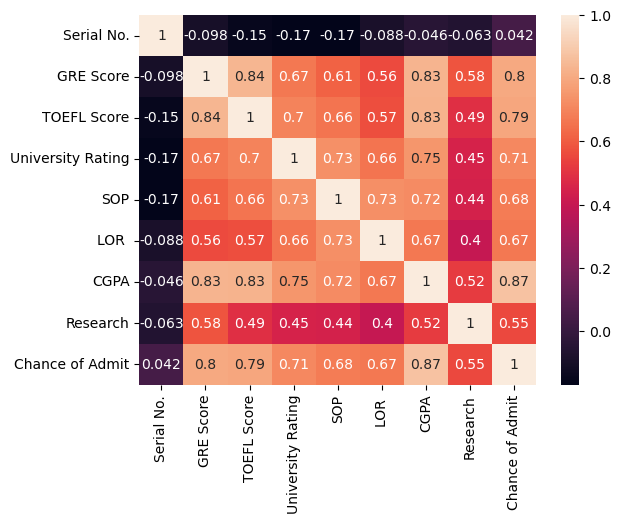

In [44]:
# plot correlation headmap

sns.heatmap(admission.corr(), annot=True)

Primary/Goal/NSM
Best describes the success of the business or mission

Granular Metrics:
Best explain users' behavior
More sensitive and actionable, can be easily influenced by design changes

Instrumentation/Guardrail Metrics

Quantitative Categorization
1. Means/Percentiles
2. Proportions/Rates
3. Ratios

Metrics can be combined to form a more comprehensive success/failure criteria

Metrics Requirements:
1. Stable & Robust, won't get influenced by the random variations
2. Sensitive to the important changes
3. Measurable 
4. Non-gameable: it should represent the actual intended user action, and cannot be easily gamed by other purposes. 

Hypothesis Testing

Binomial Distribution

The number of purchasers in n trials with purchasing probability p is Binomially Distributed.

<function matplotlib.pyplot.show(close=None, block=None)>

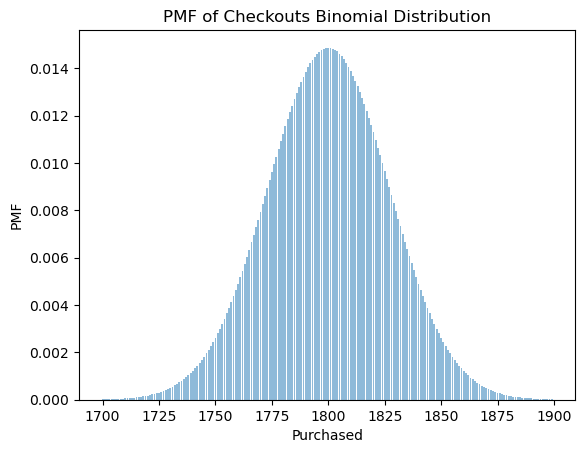

In [45]:
# Plotting Distributions - Binominal

from scipy.stats import binom

p = 0.6
n = 3000

x =  np.arange(n*p - 100, n*p + 100)
binom_a= binom.pmf(x, n, p)


plt.bar(x, binom_a, alpha = 0.5, label = 'checkout A')
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.title('PMF of Checkouts Binomial Distribution')
plt.show


Binomial Distribution for the experiment results

In [46]:
# Calculate the number of users in Group A & B (n)

n_A = checkout[checkout['checkout_page']=='A']['purchased'].count()
n_B = checkout[checkout['checkout_page']=='B']['purchased'].count()

print('Group A users:', n_A)
print('Group B users:', n_B)

Group A users: 3000
Group B users: 3000


In [47]:
# Calculate the mean purchase rates for group A & B (p)

p_A = checkout[checkout['checkout_page']=='A']['purchased'].mean()
p_B = checkout[checkout['checkout_page']=='B']['purchased'].mean()

print('Group A users:', p_A)
print('Group B users:', p_B)

Group A users: 0.8203333333333334
Group B users: 0.847


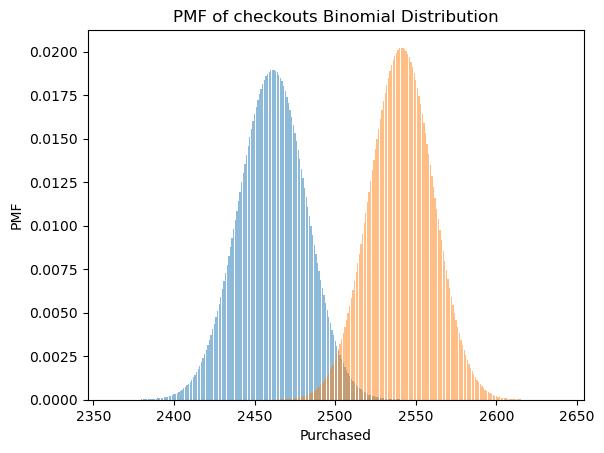

In [48]:
from scipy.stats import binom

x = np.arange(n_A*p_A-100, n_B*p_B+100)
binom_a = binom.pmf(x,n_A,p_A)
binom_b = binom.pmf(x,n_B,p_B)

plt.bar(x, binom_a, alpha= 0.5, label = 'Checkout_A')
plt.bar(x, binom_b, alpha= 0.5, label = 'Checkout_B')
plt.xlabel('Purchased')
plt.ylabel('PMF')
plt.title('PMF of checkouts Binomial Distribution')
plt.show()

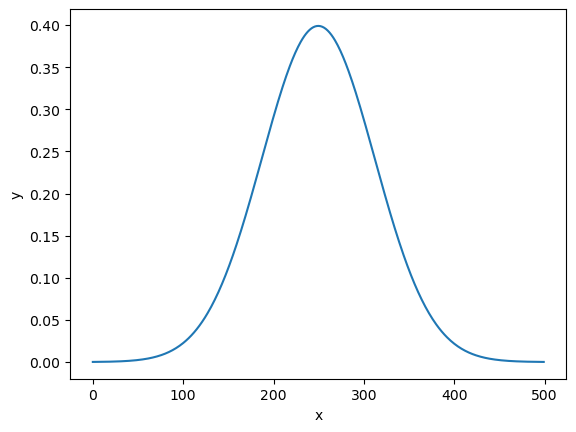

In [49]:
# Plotting Distributions - Normal

from scipy.stats import norm

mean = 0
sd = 1

x = np.linspace(-4,4,500)
norm_a = norm.pdf(x,0,1)

sns.lineplot(norm_a)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

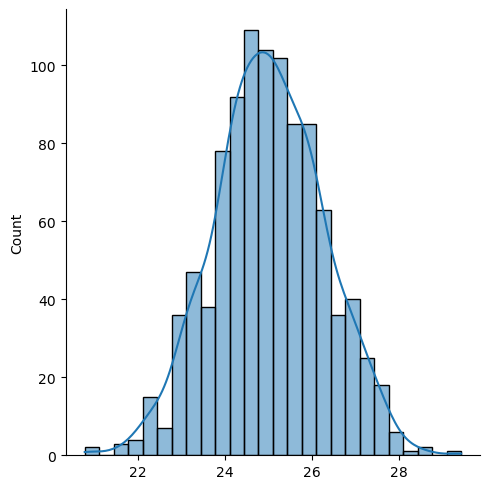

In [50]:
# CLT in Python

np.random.seed(47)

# Create an empty list to hold means
sampled_means = []

# create loop to simulate 1000 sample means
for i in range(1000):
    sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)

# Get the sample mean and append to list
    sample_mean = np.mean(sample)
    sampled_means.append(sample_mean)
    
# Plot distribution
sns.displot(sampled_means, kde = True)
plt.show()

Power & Sample size calculation

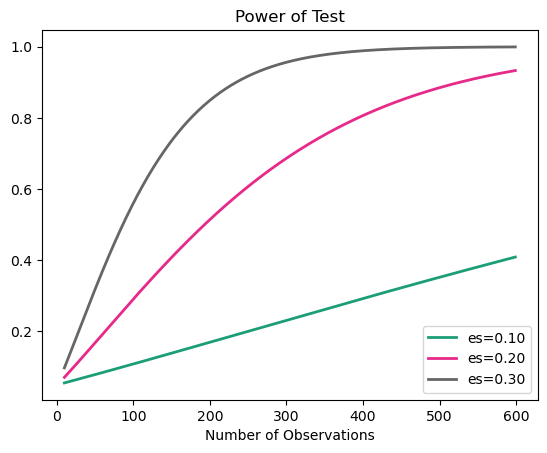

In [51]:
# Plot power curve based on different sample sizes and effect sizes

from statsmodels.stats.power import TTestIndPower

# Specify parameters for power analysis
sample_sizes = np.array(range(10, 600))
effect_sizes = np.array([0.1, 0.2, 0.3])

TTestIndPower().plot_power(nobs=sample_sizes, effect_size = effect_sizes)
plt.show()

In [52]:
# Sample size for mean

# Calculate and print the baseline mean and standard deviation
mean_B = checkout[checkout['checkout_page']=='B']['order_value'].mean()
print(mean_B)

std_B = checkout[checkout['checkout_page']=='B']['order_value'].std()
print(std_B)



29.876202331571395
7.277644184694833


In [53]:
# Define mean_new and calculate the standardized effect size
mean_new = 31

std_effect_size=(mean_new-mean_B)/std_B
print(std_effect_size)

0.15441778134633108


In [54]:
from statsmodels.stats.power import TTestIndPower

# Calculate the required sample size using the calculated std effect size, given power and significant level.
sample_size = TTestIndPower().solve_power(effect_size = std_effect_size, power = 0.8, alpha = 0.05, nobs1 = None)

print(sample_size)

659.2892380942754


In [55]:
# sample size for proportions

# Calculate the baseline signup rate for group A

p_A = checkout[checkout['checkout_page']== 'A']['purchased'].mean()

print('Group A mean purchase rate:', p_A)

Group A mean purchase rate: 0.8203333333333334


In [56]:
from statsmodels.stats.proportion import proportion_effectsize

effect_size_std=proportion_effectsize(0.9, p_A)

print(effect_size_std)

0.23192900652125958


In [57]:
from statsmodels.stats import power

sample_size = power.TTestIndPower().solve_power(effect_size=effect_size_std, power = 0.8, alpha = 0.05, nobs1 = None)

print(sample_size)

292.791140464288


Multi-varient test

In [58]:
#Corrected p-value by Bonferroni Correction

import statsmodels.stats.multitest as smt

pvals = [0.0126, 0.0005, 0.00007, 0.009]

corrected = smt.multipletests(pvals, alpha=0.05, method='bonferroni')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Bonferroni Corrected alpha: {:.4f}'.format(corrected[3]))

Significant Test: [False  True  True  True]
Corrected P-values: [0.0504  0.002   0.00028 0.036  ]
Bonferroni Corrected alpha: 0.0125


In [59]:
#Corrected p-value by Sidak Correction

import statsmodels.stats.multitest as smt

pvals = [0.0126, 0.0005, 0.00007, 0.009]

corrected = smt.multipletests(pvals, alpha=0.05, method='sidak')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Bonferroni Corrected alpha: {:.4f}'.format(corrected[3]))


Significant Test: [ True  True  True  True]
Corrected P-values: [0.04945542 0.0019985  0.00027997 0.03551691]
Bonferroni Corrected alpha: 0.0125


Data Cleaning & EDA

Missing Values: Drop, Ignore, Impute 
fillnull(0)


Duplicates: identical rows should be dropped
.drop_duplicates(keep = 'first')

Duplicates: Some other duplicated records were caused by user behavaior, which should be handled case by case.


EDA summary stats
mean(), count(), median(), std()

EDA plotting:
bar plot:(sns.barplot(x = , y = , estimator = np.mean))
histogram: (sns.displot(data = , x = , hue = , kde = True))
(To show metrics change through time) time series/line plots: (sns.lineplot(data= , x = , y = , hue = , ci - False))


In [60]:
# Check for duplicate rows due to logging issues 
print(len(AdSmart))
print(len(AdSmart.drop_duplicates(keep='first')))

8077
8077


In [ ]:
# Calculate the unique users in group B and compute the metrics

print(homepage[homepage['landing_page']=='B']['user_id'].nunique())

print(homepage[homepage['landing_page']=='B'].groupby('user_id')['signup'].max().sum())

print(homepage[homepage['landing_page']=='B']['signup'].sum())


In [69]:
# Summary stats
checkout.groupby('checkout_page')['purchased'].agg({'mean','std','count'})

,count,mean,std
checkout_page,,,
A,3000,0.820333,0.383974
B,3000,0.847000,0.360048
C,3000,0.867667,0.338909


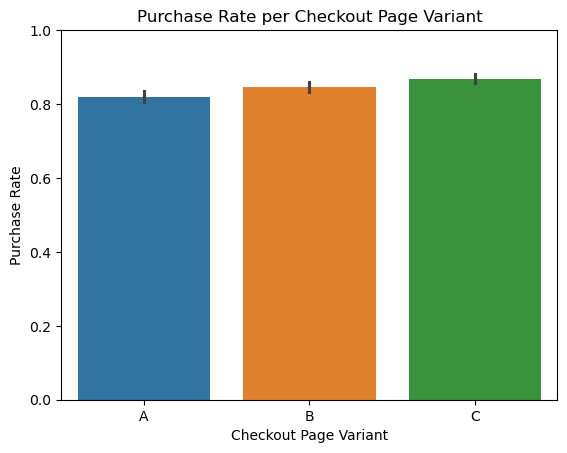

In [73]:
# Bar plot
sns.barplot(x = checkout['checkout_page'], y = checkout['purchased'], estimator = np.mean, hue = checkout['checkout_page'], label = True)
plt.ylim(0, 1)
plt.title('Purchase Rate per Checkout Page Variant')
plt.xlabel('Checkout Page Variant')
plt.ylabel('Purchase Rate')
plt.show()

<Axes: xlabel='order_value', ylabel='Count'>

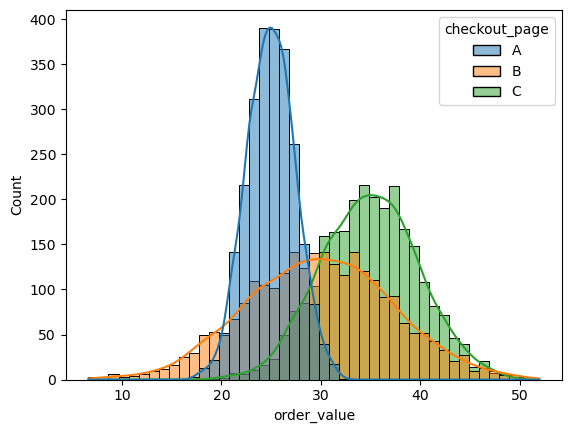

In [ ]:
# Histgram
sns.histplot(data = checkout, x = 'order_value' , hue = 'checkout_page', kde = True)

# kde is the distribution line

/var/folders/j5/dv1r8mx94rsf2mp53d2brvd40000gq/T/ipykernel_84052/1646218511.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = AdSmart, x = 'date', y = 'no', hue = 'experiment', ci = False)


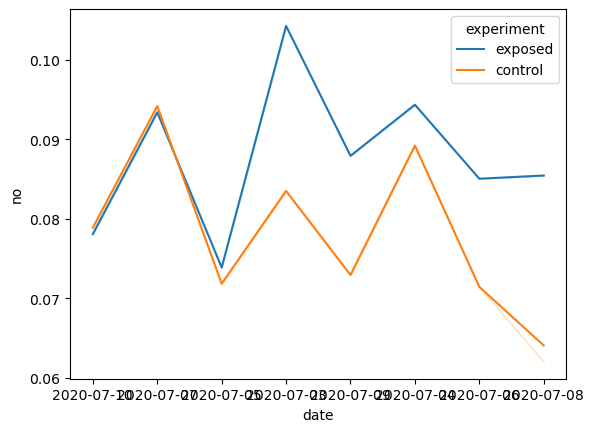

In [78]:
# line plot

sns.lineplot(data = AdSmart, x = 'date', y = 'no', hue = 'experiment', errorbar= ('ci', False))
plt.show()

In [84]:
# Sample Ratio Mismatch
# Assign the unqiue counts to each variant
control_users = checkout[checkout['checkout_page']=='A']['user_id'].nunique()
treatment_users = checkout[checkout['checkout_page']=='B']['user_id'].nunique()
total_users = control_users + treatment_users

print("Control unique users:",control_users)
print("Control unique users:",treatment_users)


Control unique users: 2940
Control unique users: 2938


In [86]:
# Calculate the percentages and create two lists
from scipy.stats import chisquare

control_perc = control_users/total_users
treatment_perc = treatment_users/total_users

print("Percentage of users in the Control group:",100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:",100*round(treatment_perc,5),"%")

observed = [control_users, treatment_users]
expected = [total_users/2, total_users/2]

# Run chisquare test on observed and expected lists and print the results
chi = chisquare(observed, f_exp=expected)

print(chi)

if chi[1] < 0.01:
    print("SRM may be present")
else:
    print("SRM likely not present")

Percentage of users in the Control group: 50.017 %
Percentage of users in the Exposed group: 49.983 %
Power_divergenceResult(statistic=0.0006805035726437564, pvalue=0.9791883740327534)
SRM likely not present


In [87]:
# Check distribution balance

AdSmart.groupby('experiment')['platform_os'].value_counts(normalize = True)

experiment  platform_os
control     6              0.924343
            5              0.075657
exposed     6              0.969795
            5              0.029955
            7              0.000250
Name: proportion, dtype: float64

In [88]:
checkout.groupby('checkout_page')['gender'].value_counts(normalize = True)

checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64

In [93]:
# Difference in proportions A/B test (Confidence Interval Calculation)

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Calculate the number of users in Group A and Group B
n_A = checkout[checkout['checkout_page']=='A']['user_id'].nunique()
n_B = checkout[checkout['checkout_page']=='B']['user_id'].nunique()

print('Group A users:', n_A)
print('Group B users:', n_B)

# Compute unique purchasers in each group and assign them to a list
purchaser_A = checkout[checkout['checkout_page']=='A'].groupby('user_id')['purchased'].max().sum()
purchaser_B = checkout[checkout['checkout_page']=='B'].groupby('user_id')['purchased'].max().sum()

print('number of purchasers in group A:', purchaser_A)
print('number of purchasers in group B:', purchaser_B)

purchasers_abtest = [purchaser_A, purchaser_B]
n_abtest = [n_A, n_B]

# Calculate the z-stats, p-value, and 95% confidence interval
z_stat, pvalue = proportions_ztest(purchasers_abtest, nobs= n_abtest)
(A_lo95, B_lo95), (A_up95, B_up95) = proportion_confint(purchasers_abtest, nobs = n_abtest, alpha=0.05)


print(f'p-value: {pvalue:.4f}')
print(f'Group A 95% CI : [{A_lo95:.4f}, {A_up95:.4f}]')
print(f'Group B 95% CI : [{B_lo95:.4f}, {B_up95:.4f}]')

Group A users: 2940
Group B users: 2938
number of purchasers in group A: 2414.0
number of purchasers in group B: 2491.0
p-value: 0.0058
Group A 95% CI : [0.8072, 0.8349]
Group B 95% CI : [0.8349, 0.8608]


In [94]:
# Calculate the average purchase rate for group A
pop_mean = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
print(pop_mean)

# Calculate 20 90% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.90))
    print(confidence_interval)
    
# Calculate 20 99% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(),
      	nobs=100, 
      	alpha=(1 - 0.01))
    print(confidence_interval)

0.8203333333333334
(0.7912669777384846, 0.9087330222615153)
(0.7454722433688197, 0.8745277566311804)
(0.6897510764476065, 0.8302489235523935)
(0.8146830076144598, 0.9253169923855402)
(0.8385342148455946, 0.9414657851544054)
(0.7342058549219411, 0.865794145078059)
(0.7682139027472309, 0.891786097252769)
(0.8146830076144598, 0.9253169923855402)
(0.7454722433688197, 0.8745277566311804)
(0.8385342148455946, 0.9414657851544054)
(0.7454722433688197, 0.8745277566311804)
(0.8385342148455946, 0.9414657851544054)
(0.7118625465164149, 0.8481374534835852)
(0.8029257122801267, 0.9170742877198733)
(0.6678510872869203, 0.8121489127130797)
(0.7912669777384846, 0.9087330222615153)
(0.7796986699789777, 0.9003013300210222)
(0.7568067872454262, 0.8831932127545737)
(0.7682139027472309, 0.891786097252769)
(0.7230037568938057, 0.8569962431061944)
(0.8595651048621527, 0.8604348951378473)
(0.8795927104494925, 0.8804072895505075)
(0.8795927104494925, 0.8804072895505075)
(0.7894895014630068, 0.7905104985369933)


In [106]:
# Analyze difference in mean (Continuous variables) - T-test
# t-test between group A and group B for their order values

import pingouin as pg
print(checkout.groupby('checkout_page')['order_value'].mean())

ttest = pg.ttest(x=checkout[checkout['checkout_page']=='A']['order_value'],
                        y=checkout[checkout['checkout_page']=='B']['order_value'],
                         paired = False,
                          alternative = 'two-sided')

print(ttest)

checkout_page
A    24.956437
B    29.876202
C    34.917589
Name: order_value, dtype: float64
                T          dof alternative          p-val           CI95%  \
T-test -32.285094  3110.673039   two-sided  1.772895e-197  [-5.22, -4.62]   

         cohen-d       BF10  power  
T-test  0.901468  5.07e+203    1.0  


In [110]:
# t-test between group A and group B for their time on page

import pingouin as pg
print(checkout.groupby('checkout_page')['time_on_page'].mean())

ttest = pg.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'],
                        y=checkout[checkout['checkout_page']=='B']['time_on_page'],
                         paired = False,
                          alternative = 'two-sided')

print(ttest)

checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64
               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  7.026673  5998   two-sided  2.349604e-12  [1.4, 2.49]  0.181428   

             BF10  power  
T-test  1.305e+09    1.0  


In [111]:
# t-test between group A and group C for their time on page

print(checkout.groupby('checkout_page')['time_on_page'].mean())

ttest2 = pg.ttest(x=checkout[checkout['checkout_page']=='A']['time_on_page'],
                        y=checkout[checkout['checkout_page']=='C']['time_on_page'],
                         paired = False,
                          alternative = 'two-sided')

print(ttest2)

checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64
               T   dof alternative         p-val        CI95%   cohen-d  \
T-test  8.833244  5998   two-sided  1.316118e-18  [1.9, 2.99]  0.228073   

             BF10  power  
T-test  1.811e+15    1.0  


In [114]:
# Pairwise t-test: used when there are multiple groups (more than 2), and it runs the t-tests for a pair of two each time

pairwise = pg.pairwise_tests(data = checkout, dv='order_value', between = 'checkout_page', padjust = 'bonf')

print(pairwise)

        Contrast  A  B  Paired  Parametric          T          dof  \
0  checkout_page  A  B   False        True -32.285094  3110.673039   
1  checkout_page  A  C   False        True -92.936400  3859.188432   
2  checkout_page  B  C   False        True -29.128563  4421.162781   

  alternative          p-unc         p-corr p-adjust        BF10    hedges  
0   two-sided  1.772895e-197  5.318686e-197     bonf   5.07e+203 -0.901333  
1   two-sided   0.000000e+00   0.000000e+00     bonf         inf -2.568710  
2   two-sided  8.538824e-171  2.561647e-170     bonf  4.988e+168 -0.815951  


In [115]:

pairwise2 = pg.pairwise_tests(data = checkout, dv='time_on_page', between = 'checkout_page', padjust = 'bonf')

print(pairwise2)

        Contrast  A  B  Paired  Parametric         T     dof alternative  \
0  checkout_page  A  B   False        True  7.026673  5998.0   two-sided   
1  checkout_page  A  C   False        True  8.833244  5998.0   two-sided   
2  checkout_page  B  C   False        True  1.995423  5998.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  2.349604e-12  7.048812e-12     bonf  1.305e+09  0.181405  
1  1.316118e-18  3.948354e-18     bonf  1.811e+15  0.228045  
2  4.604195e-02  1.381258e-01     bonf      0.212  0.051515  


In [119]:
import pingouin as pg

# Non-Parametric tests - Mann-Whiteney U test
print(checkout.groupby('checkout_page')['time_on_page'].agg({'mean','count'}))

# Take a random sample of size 25 from each variant
np.random.seed(40)
top_sample_B = checkout[checkout['checkout_page']=='B'].sample(25)['time_on_page']
top_sample_C = checkout[checkout['checkout_page']=='C'].sample(25)['time_on_page']

# Run a Mann-Whiteney U test with those 25 samples from each group
mwu_test= pg.mwu(x = top_sample_B, y = top_sample_C, alternative = 'two-sided')

print(mwu_test)

               count       mean
checkout_page                  
A               3000  44.668527
B               3000  42.723772
C               3000  42.223772
     U-val alternative     p-val     RBC    CLES
MWU  416.0   two-sided  0.045663  0.3312  0.6656


In [ ]:
# Chi-square test for independency
# Using the homepage dataset, which is not imported into this notebook

from scipy import stats

# Calculate the number of users in groups A and B
n_A = homepage[homepage['landing_page'] == 'A']['user_id'].nunique()
n_B = homepage[homepage['landing_page'] == 'B']['user_id'].nunique()

# Compute unique signups in each group
signup_A = homepage[homepage['landing_page'] == 'A'].groupby('user_id')['signup'].max().sum()
no_signup_A = n_A - signup_A
signup_B = homepage[homepage['landing_page'] == 'B'].groupby('user_id')['signup'].max().sum()
no_signup_B = n_B - signup_B

# Create the signups table
table = [[signup_A, no_signup_A], [signup_B, no_signup_B]]
print('Group A signup rate:',round(signup_A/n_A,3))
print('Group B signup rate:',round(signup_B/n_B,3))

# Calculate p-value
print('p-value=',stats.chi2_contingency(table,correction=False)[1])

Delta Method -- sometimes the analyzed unit in the metric of interest is more granular than the randomization unit. For instance, we can randomize on user_id and try to examine the impact of our changes on per session or page view metrics. This violates some of the assumptions around the calculation of the variance which we use in significance tests. The Delta method can help account for this discrepancy.

In [66]:
# Generate Delta Methods Function (ratio metrics)

import numpy as np
from scipy.stats import norm

def delta_method_ztest_p(p1, n1, p2, n2):
    # Calculate the pooled proportion
    p_pool = (p1 * n1 + p2 * n2) / (n1 + n2)
    
    # Calculate the standard error using the delta method
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    
    # Calculate the z-statistic
    z_stat = (p1 - p2) / se
    
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    
    return z_stat, p_value

# Example values
p1 = 0.5
n1 = 1000
p2 = 0.6
n2 = 1000

z_stat, p_value = delta_method_ztest_p(p1, n1, p2, n2)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: -4.4946657497549465, P-value: 6.967931072798805e-06


In [67]:
# Generate Delta Methods Function (numeric metrics)

import numpy as np
from scipy.stats import norm

def delta_method_ztest(x_control, y_control, x_treatment, y_treatment):
    # Calculate the means and standard deviations
    mean_x_control = np.mean(x_control)
    mean_y_control = np.mean(y_control)
    mean_x_treatment = np.mean(x_treatment)
    mean_y_treatment = np.mean(y_treatment)
    
    std_x_control = np.std(x_control, ddof=1)
    std_y_control = np.std(y_control, ddof=1)
    std_x_treatment = np.std(x_treatment, ddof=1)
    std_y_treatment = np.std(y_treatment, ddof=1)
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt((std_x_control**2 + std_y_control**2 + std_x_treatment**2 + std_y_treatment**2) / 4)
    
    # Calculate the effect size
    effect_size = (mean_x_treatment - mean_x_control) / pooled_std
    
    # Calculate the standard error using the delta method
    se = pooled_std / np.sqrt(len(x_control) + len(y_control) + len(x_treatment) + len(y_treatment))
    
    # Calculate the z-statistic
    z_stat = effect_size / se
    
    # Calculate the p-value
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    
    return z_stat, p_value

# Example values
x_control = np.array([1.2, 2.3, 3.1, 4.0, 5.5])
y_control = np.array([2.1, 3.4, 4.2, 5.0, 6.3])
x_treatment = np.array([3.5, 4.6, 5.7, 6.8, 7.9])
y_treatment = np.array([4.4, 5.5, 6.6, 7.7, 8.8])

z_stat, p_value = delta_method_ztest(x_control, y_control, x_treatment, y_treatment)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

Z-statistic: 3.939228260841398, P-value: 8.174413013684045e-05


In [69]:
# Delta Method to deal the metrics changes are more granular than the randomization unit

# Create DataFrames for per user metrics for variants A and C

import pandas as pd
import scipy.stats as stats


A_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page'] =='A'].groupby('user_id')['order_value'].sum(),
                           'page_view':checkout[checkout['checkout_page'] =='A'].groupby('user_id')['user_id'].count().sort_values(ascending=False)})

C_per_user = pd.DataFrame({'order_value':checkout[checkout['checkout_page'] =='C'].groupby('user_id')['order_value'].sum(),
                           'page_view':checkout[checkout['checkout_page'] =='C'].groupby('user_id')['user_id'].count().sort_values(ascending=False)})

print(A_per_user)
print(C_per_user)

# C_per_user['page_view'].sort_values(ascending=False)

# Assign the control and treatment ratio columns
x_control = A_per_user['order_value']
y_control = A_per_user['page_view']
x_treatment = C_per_user['order_value']
y_treatment = C_per_user['page_view']


# stats.ztest_delta(x_control,y_control,x_treatment,y_treatment)
z_stat, p_value = delta_method_ztest(x_control,y_control,x_treatment,y_treatment)
print(f"Z-statistic: {z_stat}, P-value: {p_value}")

         order_value  page_view
user_id                        
834537     24.024018          1
834553     23.054541          1
834580      0.000000          1
834581     24.810874          1
834604     22.988116          1
...              ...        ...
914443      0.000000          1
914458     24.111263          1
914523     25.701104          1
914566     23.050192          1
914573     21.496632          1

[2940 rows x 2 columns]
         order_value  page_view
user_id                        
834540     32.312083          1
834555     37.363948          1
834580     36.206020          1
834591      0.000000          1
834616     33.046010          1
...              ...        ...
914501     32.593037          1
914506      0.000000          1
914507     37.361236          1
914538     28.535715          1
914577      0.000000          1

[2954 rows x 2 columns]
Z-statistic: 14.896092544212305, P-value: 0.0
